In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
DATADIR = "E:/Common Flower Names"
CATEGORIES = ['Aconitum (Ranunculus Family)',
              'African Daisy (Gazania)',
              'Agapanthus (Star of Bethlehem)',
              'Ageratum houdtonianum (Floss Flower)',
              'Alchemilla (Ladys Mantle)',
              'Allium roseum (Onion, Garlic)',
              'Alstroemeria (Peruvian Lily)',
              'Alyssum (Sweet Alyssum)',
              'Amaranthus (Princes Feather)',
              'Amaryllis (Hippeastrum)',
              'Babys Breath (Gypsophila)',
              'Bachelors Button (Cornflower)',
              'Balloon Flower (Platycodon grandiflorus)',
              'Bee Balm Flower (Monarda)',
              'Begonia (Begoniaceae)',
              'Bellflower (Campanula)',
              'Bergenia (Saxifragas)',
              'Black-Eyed Susan (Rudbeckia)',
              'Calendula officinalis',
              'California Poppy (Eschscholzia californica)',
              'Calla Lily (Arum Lily) Araceae',
              'Campanula latifolia (Giant Bellflower)',
              'Candytuft (Iberis)',
              'Canna Lily (Zingiberales)',
              'Cape Primrose (Streptocarcus)',
              'Cardinal Flower (Lobelia cardinalis)',
              'Carnation (Dianthus caryopyllus)',
              'Celosia (Amarynth Family. Wool flower)',
              'Chrysnthemum (Asteraceae)',
              'Clarkia (Farewell to Spring)',
              'Clematis (Ranunculus)',
              'Clover (Pea Family)',
              'Daffodil (Narcissus)',
              'Dahlia (Aster Family)',
              'Daisy (Aster Family)',
              'Daphne (Daphne odora, Winter Daphne)',
              'Day Lily (Hemerocallis)',
              'Delphinium (Ranunculus Family. Larkspur)',
              'Desert Rose (Dogbane)',
              'Dianella (Flax Lily)',
              'Dianthus (Carnation Family. Pinks, Sweet William)',
              'Diascia (Twin Spur)',
              'Dichondra (Morning Glory Family. Convolvulus)',
              'Dietes (Iridaceae Family. Wild Iris)',
              'Dutch Iris (Iridaceae Family. Iris hollandia)',
              'Echinacea (Coneflower)',
              'Echium (Boraginaceae)',
              'English Bluebell',
              'Erica (Heather)',
              'Erigeron (Seaside Daisy)',
              'Euphorbia cyathophor (Mexican Fireplant, Summer Pointsettia)',
              'Eustoma (Lisianthus)',
              'Evening Primrose (Sun Cup, Sun Drop)',
              'Everlasting Daisy (Strawflower)',
              'Flannel Flower (Australian Native. Actinotus helianthi)',
              'Flax Flower (Linseed)',
              'Floss Flower (Ageratum)',
              'Forget Me Not (Mycositis)',
              'Forsythia (Golden Bells)',
              'Foxglove (Digitalis)',
              'Frangipani (Plumeria)',
              'Freesia (Iris Family.)',
              'French Marigold (Tagetes)',
              'Fuschia (Ladys Eardrop)',
              'Gaillardia (Blanket Flower)',
              'Gardenia (Jasminoides)',
              'Gaura (Whiriling Butterflies)',
              'Geranium (Cranesbill)',
              'Gerbera',
              'Gladiolus (Iris Family)',
              'Goldenrod (Solidago)',
              'Grape Hyacinth (Muscari)',
              'Gysophila (Babys Breath)',
              'Heather (Erica)',
              'Hebe (New Zealand Native. Showy Speedwell)',
              'Helenium (Sneezeweed)',
              'Heliotrope (Cherry Pie Plant)',
              'Hellebore (Winter rose)',
              'Hex (Holly)',
              'Hibiscus (Hibiscus rosa-sinensis, Rose Mallow)',
              'Hollyhock (Alcea Rosea)',
              'Honesty (Lunaria)',
              'Honeysuckle (Lonicera)',
              'Hosta (Plantain Lily)',
              'Hyacinth (Asparagus Family)',
              'Hydrangea (Hortensia)',
              'Hypericum (St. Johns Wort)',
              'Iberis (Candytuft)',
              'Ice Plant (Delosperma)',
              'Iceland Poppy (Papaver nudicaule)',
              'Impatiens (Busy Lizzie)',
              'Ipheion uniflorum (Amaryllis Family. Starflower, Spring Starflower)',
              'Ipomoea (Morning Glory)',
              'Ipomoea alba (Moonflower Vine)',
              'Iris (Iridaceae)',
              'Ixia (Iris Family. Corn Lily)',
              'Ixora (West Indian Jasmine)',
              'Jaborosa (Nightshade Family)',
              'Jacobs Ladder (Polemonium)',
              'Jamesia americana (Hydrangea Family)',
              'Jasmine (Jasmine officinale)',
              'Jonquil (Narcissus)',
              'Kaffir Lily (Clivia miniata)',
              'Kalmia (Heath)',
              'Kangaroo Paw (Australian Native)',
              'Knautia macedonica (Macedonia scabiosa)',
              'Kniphofia (Red Hot Poker Plant)',
              'Kolwitzia (Caprifoliaceae Family. Beauty Bush)',
              'Ladys Slipper (Cypripedium)',
              'Lantana (Shrub Verbena)',
              'Lavatera (Mallow)',
              'Lavender (Lavandula)',
              'Lechenaultia (Australian Native)',
              'Lilac (Syringa vulgaris)',
              'Lily (Lilium)',
              'Lily of the Valley (Convallaria majalis)',
              'Linaria (Snapdragon Family)',
              'Lisianthus (Euphoma)',
              'Lobelia (Asthma Weed)',
              'Lotus (Nelumbo nucifera)',
              'Love in the Mist (Nigella)',
              'Lunaria (Money Plant)',
              'Lupin (Lupinus)',
              'Magnolia (Magnoliaceae)',
              'Mallow (Lavatera)',
              'Maltese Cross (Lychnis chalcedonica)',
              'Mandevilla (Chilean Jasmine)',
              'Marguerite Daisy (Argyranthemum)',
              'Marigold (Tagetes)',
              'Matthiola (Stock Flower)',
              'Mayflower (Trailing Arbutus)',
              'Meconopsis (Blue Himalayan Poppy)',
              'Mimosa (Mimosa pudica, Touch Me Not)',
              'Mina lobata (Spanish Flag)',
              'Monks Hood (Aconitum)',
              'Moonflower (Ipomea alba)',
              'Morning Glory (Ipomea purpurea)',
              'Muscari (Grape Hyacinth)',
              'Narcissus (Paper Whites)',
              'Nasturtium (Tropaeolum)',
              'Nemesia (Plantaginaceae Family)',
              'Nemophila (Baby Blue Eyes)',
              'Nepeta (Catmint)',
              'Nerine (Amaryllis Family)',
              'Nicotiana (Tobacco Plant)',
              'Nierembergia (Cup Flower)',
              'Nigella (Love in the Mist)',
              'Nolana (Nightshade Family, Chilean Bell Flower)',
              'Nymphea (Water Lily)',
              'Orchid (Orchidaceae)',
              'Oriental Lily (Stargazer)',
              'Oriental Poppy (Papaver)',
              'Ornamental Onion (Allium)',
              'Osteospermum (Calendula Family. Cape Daisy)',
              'Ox Eye Daisy',
              'Oyster Plant (Acanthus mollis)',
              'Painted Daisy (Tanacetum coccineum)',
              'Pansy (Viola wittrockiana)',
              'Passion Flower (Passiflora)',
              'Peace Lily (Lilium)',
              'Pelargonium (Angel Eyes)',
              'Penstemon (Beard Tongue)',
              'Peony (Paeoniaceae Family)',
              'Persian Buttercup (Ranunculus)',
              'Peruvian Lily (Alstroemeria)',
              'Petunia (Nightshade Family, Solanaceae)',
              'Phlox (Polemoniaceae Family, Jacobs Ladder)',
              'Pincushion Flower (Scabiosa)',
              'Pink Ladys Slipper (Cypripedium Orchid)',
              'Plume Celosia (Amaranthus Family, Cockscomb)',
              'Pointsettia (Christmas Flower, Easter Flower)',
              'Polyanthus (Streptocarpus polyanthus)',
              'Poppy Anemone (Coronaria)',
              'Portulaca grandiflora (Moss Rose)',
              'Pot Marigold (Calendula officinalis)',
              'Powder Puff (Calliandra)',
              'Primula. (Primula vulgaris, True Primrose)',
              'Purple Coneflower (Echinacea)',
              'Quaker Ladies (Houstonia)',
              'Queen Annes Lace (Wild Carrot)',
              'Queen of the Meadow (Filipendula)',
              'Queens Cup (Clintonia)',
              'Quince (Flowering)',
              'Rain Lily (Amaryllis Family, Zephyranthes)',
              'Ranunculus (Persian Buttercup)',
              'Rock Rose (Cistus incanus)',
              'Rondeletia (Rubiaceae Family, Bedstraw Plant)',
              'Rose (Rosaceae Family)',
              'Rose of Sharon (Hibiscus syriacus)',
              'Rudbeckia (Black-Eyed Susan)',
              'Salvia splendens (Sage)',
              'Saponaria (Soapwort)',
              'Scabiosa (Pincushion Flower)',
              'Scaevola (Fan Flower)',
              'Scented Geranium (Pelargonium)',
              'Scilla (Hyacinth Family)',
              'Sedum (Crassulaceae Family, Stonecrops)',
              'Shasta Daisy (Leucanthemum)',
              'Silene (Carnation Family)',
              'Snapdragon (Antirrhinum)',
              'Snowdrop (Galanthus)',
              'Snowflake (Leucojum)',
              'Solidago (Goldenrod)',
              'Speedwell (Veronica)',
              'Statice (Sea Lavender, Limonium)',
              'Sun Drop (Oenothera)',
              'Sweet Pea (Lathorys odoratus)',
              'Syringa (Philadelphus lewisii)',
              'Tagetes (Marigold)',
              'Tea Rose (Gloire de Dijon)',
              'Thunbergia (Black-Eyed Susan)',
              'Tiger Flower (Tigridia)',
              'Tiger Lily (Lilium tigrinum)',
              'Tithonia (Mexican Sunflower)',
              'Trachelium (Campanula)',
              'Trillium (Melanthiaceae)',
              'Triteleia (Triplet Lily)',
              'Tritonia crocata (Flame Freesia)',
              'Trollius (Ranunculus Family, Globeflower)',
              'Tropaeolum (Nasturtium)',
              'Trumpet Vine (Hummingbird Vine, Campsis radicans)',
              'Tuberose (Fever Root, Snapdragon Root, Ruellia tuberosa)',
              'Tulip (Lily Family, Tulipa)',
              'Urn Plant (Aechmea)',
              'Ursinia (Daisy Family)',
              'Uva Ursi (Arctostaphylos uva-ursi, Bear Berry)',
              'Verbena (Vervain)',
              'Veronica incana (Silver Speedwell)',
              'Viburnum (Adoxaceae Family)',
              'Vinca Minor (Periwinkle)',
              'Viola (Double, Cultivar)',
              'Viola tri-colour (Heartsease, Johnny Jump Up)',
              'Viola wittrockiana (Violaceae Family, Pansy)',
              'Violet (Violaceae Family)',
              'Virginia Creeper (Vitaceae family)',
              'Wallflower (Erysimum)',
              'Wandflower (Spraxis)',
              'Waterlily (Nymphaea)',
              'Watsonia (Iris Family, Bugle Lily)',
              'Wax Plant (Hoya carnosa)',
              'Wedelia (Sunflower Family)',
              'Weigela (Caprifoliaceae Family)',
              'Whirling Butterflies (Gaura)',
              'Wild Rose (Rosaceae Family)',
              'Wild Violet (Viola sororia)',
              'Windflower (Anemone)',
              'Winter Aconite (Eranthus)',
              'Winter Jasmine (Jasminum nudiflorum)',
              'Winterberry (Ilex verticillata)',
              'Wishbone Flower (Torenia fournieri)',
              'Wisteria (Pea Family, Fabaceae)',
              'Woolly Violet (Viola sororia)',
              'Xanthoceras sorbifolium (Yellowhorn)',
              'Xeranthemum (Helichrysum bracteatum, Strawflower)',
              'Xerophyllum (Bear Grass. Indian Basket Grass)',
              'Xylobium (Orchid)',
              'Xylosma (Salicaceae Family)',
              'Xyris difformis (Bog Yellow-Eyed Grass)',
              'Yarrow (Achillea)',
              'Yellow Archangel (Aluminium Plant)',
              'Yellow Bell (Golden Trumpet)',
              'Yellow-Eyed Grass (Sisyrinchium californicum)',
              'Zenobia (Honeycup)',
              'Zephyranthes (Rain Lily)',
              'Zinnia elegans (Aster Family)']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[[ 25  74  46]
  [ 28  77  49]
  [ 29  78  50]
  ...
  [  5  62  41]
  [  8  65  44]
  [ 10  67  46]]

 [[ 26  75  47]
  [ 28  77  49]
  [ 29  78  50]
  ...
  [  7  64  43]
  [  9  66  45]
  [ 11  68  47]]

 [[ 27  75  49]
  [ 29  77  51]
  [ 29  78  50]
  ...
  [  8  65  44]
  [ 10  66  45]
  [ 11  67  46]]

 ...

 [[ 16  65  45]
  [ 17  66  46]
  [ 18  67  47]
  ...
  [  4 121  76]
  [  4 121  76]
  [  4 121  76]]

 [[ 15  64  44]
  [ 17  66  46]
  [ 18  67  47]
  ...
  [  4 122  79]
  [  4 122  79]
  [  4 122  79]]

 [[ 15  64  44]
  [ 17  66  46]
  [ 18  67  47]
  ...
  [  5 123  80]
  [  5 123  80]
  [  5 123  80]]]


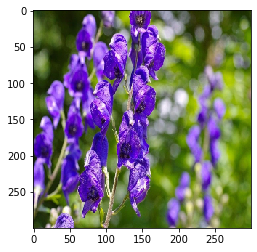

In [3]:
IMG_SIZE = 300
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

In [5]:
print(len(training_data))

24866


In [6]:
import random
random.shuffle(training_data)

In [7]:
for sample in training_data:
    print(sample[1])

195
52
242
14
43
243
263
203
78
115
100
44
33
165
148
33
62
36
209
231
253
121
209
163
99
186
47
18
260
7
124
230
60
121
58
221
19
167
233
251
56
194
97
168
109
144
11
138
170
37
171
235
162
260
194
78
244
31
253
139
178
90
33
264
22
35
106
202
63
70
9
56
155
252
155
41
179
46
253
264
193
9
223
189
228
225
249
232
119
211
43
141
86
59
20
162
64
231
141
229
141
216
34
90
70
16
36
112
179
226
229
224
154
203
141
83
168
34
158
45
153
105
114
12
205
37
235
210
176
38
153
143
181
73
199
213
39
122
238
74
163
163
124
250
108
163
53
97
215
199
91
234
227
116
231
257
235
202
92
31
195
130
25
64
51
18
120
228
207
141
262
208
109
13
38
5
47
113
89
210
232
110
115
219
196
219
11
1
4
164
56
159
256
147
54
80
161
201
136
154
262
95
56
212
234
5
93
54
69
252
63
102
261
193
0
21
241
221
0
93
54
207
140
247
100
91
182
193
137
4
64
30
7
57
156
99
163
79
131
253
113
103
161
108
41
29
230
248
250
185
18
58
196
200
110
173
121
71
50
50
25
191
178
243
77
149
92
252
0
51
37
48
104
243
8
5
257
108
100
29
179

257
59
246
195
261
214
172
110
135
63
171
62
104
94
153
198
257
166
248
45
93
9
35
171
7
219
44
202
122
78
108
208
132
162
237
28
167
121
155
251
125
68
216
159
196
251
81
47
109
91
248
194
171
96
1
115
98
99
149
252
230
107
97
83
120
50
256
91
251
92
18
147
107
239
239
152
100
154
109
21
48
84
167
100
78
15
81
214
259
28
118
206
243
178
5
192
125
80
102
114
109
122
228
201
212
258
17
198
226
254
141
125
18
102
113
68
207
98
257
44
162
163
102
55
172
52
46
23
242
123
248
101
102
233
97
82
214
219
39
260
194
12
190
221
109
121
224
119
81
156
222
84
184
18
16
95
209
240
102
30
247
95
182
97
148
109
220
191
241
159
58
76
128
69
127
34
218
187
21
236
27
112
27
57
41
221
208
243
15
58
24
20
108
212
116
183
25
124
242
55
31
254
76
11
13
85
187
59
58
262
45
96
181
87
20
226
223
238
100
264
11
97
188
167
0
141
103
196
244
21
101
83
8
99
4
95
174
202
122
153
75
37
245
260
199
261
252
25
25
119
51
57
122
48
35
27
239
99
135
98
93
68
238
168
34
22
12
159
160
114
9
62
138
115
70
153
60
206
138
97


244
227
130
128
128
49
82
129
33
14
59
256
243
61
20
210
145
48
32
188
30
216
112
140
87
246
207
175
16
209
149
133
69
247
84
189
75
182
125
78
167
197
27
201
91
188
56
124
78
255
179
100
44
257
100
243
10
143
225
254
23
26
146
9
59
9
168
131
226
119
252
186
232
129
150
223
108
74
174
126
117
130
45
51
95
52
2
263
131
15
142
172
20
71
167
210
98
97
129
235
3
138
131
52
221
125
83
87
103
57
199
248
188
144
124
171
200
57
61
52
41
159
89
113
131
109
125
0
248
112
196
193
52
37
99
152
124
90
27
235
37
139
197
51
137
57
152
246
18
150
114
28
35
135
113
17
172
29
189
89
2
95
44
155
81
65
37
75
156
141
244
69
92
166
115
49
71
83
32
171
13
171
151
39
91
158
170
250
5
52
14
229
8
154
208
136
167
54
122
237
101
18
221
114
218
217
33
4
173
133
234
181
108
3
103
103
229
155
236
174
165
254
246
28
194
161
91
261
219
86
131
234
248
213
153
228
142
235
173
143
198
253
35
149
210
166
224
91
250
223
157
210
37
247
176
214
18
254
246
146
75
59
5
30
170
218
138
45
26
64
47
119
247
151
6
118
141
155
209


35
241
52
148
82
248
259
180
245
226
198
244
54
21
48
89
222
215
256
89
260
12
42
227
242
70
223
159
13
228
139
23
226
46
163
191
67
224
74
121
215
188
129
189
13
26
193
77
170
105
259
139
167
155
136
249
89
167
180
156
208
127
200
225
103
164
88
127
213
233
176
98
131
215
163
197
185
28
106
146
0
217
144
202
251
38
51
131
58
3
139
138
92
154
172
208
232
246
60
225
53
261
193
48
255
215
213
11
197
150
2
179
83
127
205
69
50
25
256
34
21
85
253
142
10
222
90
142
254
82
128
3
163
260
175
192
141
128
207
164
133
193
121
72
17
150
26
188
167
250
78
87
62
249
53
126
241
36
132
172
153
39
248
243
88
33
6
263
90
132
27
71
202
149
122
162
219
102
41
112
21
15
161
47
34
89
76
229
194
20
109
261
238
73
30
36
31
213
201
125
183
206
13
102
72
235
34
230
2
173
45
171
160
212
121
42
35
96
41
3
39
57
255
199
141
45
228
27
9
99
43
214
243
77
75
20
170
23
151
26
116
98
215
64
215
63
87
212
243
259
186
189
217
86
133
250
220
25
159
228
134
58
79
7
122
223
114
129
19
32
38
49
100
14
260
246
25
229
98
169

55
137
2
87
62
247
170
259
189
56
25
66
138
45
9
260
1
159
227
160
73
156
210
78
16
184
118
201
166
72
153
129
117
215
124
155
242
128
105
15
94
65
216
122
93
200
185
236
181
160
104
81
120
101
169
112
112
69
80
68
228
61
69
225
130
31
156
209
90
109
1
103
146
170
28
102
202
238
103
114
149
156
205
245
178
95
173
8
43
70
74
191
138
62
55
25
155
91
1
6
164
131
168
88
151
219
114
184
198
219
261
207
91
169
177
190
29
174
105
262
106
85
89
4
123
105
169
226
64
180
175
123
98
37
212
247
70
190
245
97
261
173
233
217
238
88
21
105
150
221
205
208
62
212
214
261
239
257
160
234
179
221
89
151
158
171
177
58
160
248
94
109
164
231
122
248
258
201
74
137
220
73
12
256
87
158
231
55
82
38
59
257
148
4
78
105
101
19
74
111
263
160
249
129
99
131
34
177
106
50
36
5
150
131
230
98
57
116
176
207
61
120
191
242
122
135
227
146
115
125
111
233
159
258
246
83
111
113
118
57
66
35
96
36
83
223
89
115
166
195
181
17
220
1
244
131
138
30
223
185
162
256
158
240
23
18
243
264
26
247
77
207
211
132
124
6


234
35
195
80
48
71
220
198
246
130
148
207
108
211
80
212
31
15
197
169
37
212
115
212
73
28
131
135
137
159
169
184
23
75
260
223
256
165
61
169
97
57
248
27
96
112
107
199
184
114
172
242
3
115
7
261
103
149
74
23
64
63
185
122
109
134
262
107
42
160
19
64
197
87
160
227
5
163
174
133
150
224
137
124
233
157
257
136
64
153
94
32
38
197
44
226
126
230
124
136
164
222
132
166
48
0
121
106
103
127
3
86
103
108
11
244
142
162
152
241
208
112
193
108
243
134
242
100
218
207
222
240
34
37
216
228
140
59
107
54
250
224
224
43
87
74
136
139
221
29
242
7
223
225
138
112
133
191
8
81
111
252
118
104
10
224
0
9
120
131
227
190
83
22
86
61
164
71
44
149
153
9
258
156
84
175
141
77
157
102
212
184
173
121
210
84
137
264
34
200
236
138
139
39
57
190
132
81
28
243
20
5
149
193
154
64
61
121
95
86
248
30
180
210
252
71
174
64
223
3
108
144
252
213
30
45
41
181
91
38
217
240
20
235
227
11
183
178
169
109
5
169
238
129
144
92
95
128
232
150
4
0
24
233
221
29
50
227
150
128
264
178
195
71
97
132
106
2

243
229
209
37
138
233
134
242
98
15
225
58
145
9
55
19
8
66
21
127
249
254
183
180
51
6
86
167
70
263
144
113
194
106
142
66
132
12
220
18
92
71
48
245
186
158
115
223
64
148
155
20
75
160
240
42
188
84
255
73
195
68
254
252
17
190
0
144
112
244
50
108
263
182
42
225
39
191
95
181
226
80
191
150
218
45
260
49
96
165
13
40
144
117
181
169
182
70
205
165
173
0
14
45
32
97
222
15
77
150
14
102
100
10
203
243
149
58
96
78
30
188
105
236
261
251
258
176
99
3
215
42
162
132
113
187
93
263
60
68
159
187
136
163
221
215
106
244
83
236
109
76
74
2
251
234
64
86
118
158
140
48
170
113
175
233
198
192
68
101
73
227
62
174
169
195
10
77
216
137
54
67
232
223
55
20
145
134
197
254
191
43
154
193
263
236
239
85
213
186
0
53
75
182
184
173
186
78
123
113
52
17
176
260
77
250
69
202
146
107
139
10
207
59
82
203
160
217
152
240
153
253
80
86
110
135
160
107
164
84
128
6
199
259
63
175
263
222
64
182
21
6
258
33
112
37
209
201
138
128
225
78
195
263
229
247
134
36
30
171
125
49
89
72
261
12
166
45
20
2

0
117
29
176
97
263
119
181
3
217
209
195
39
84
222
184
100
141
53
161
180
69
82
46
12
88
60
21
210
147
22
95
38
251
251
202
40
112
173
220
23
33
107
69
227
103
92
78
147
135
116
233
142
233
240
154
43
247
245
123
200
209
163
236
63
18
86
43
165
96
107
162
146
164
158
179
183
246
215
247
156
53
18
20
56
7
205
118
173
189
153
186
28
63
80
63
52
263
241
102
120
261
144
119
66
97
106
79
127
227
58
125
188
235
129
151
219
106
17
130
158
236
11
253
203
8
83
161
9
164
131
233
43
211
47
210
140
84
212
27
223
124
256
184
35
38
34
216
234
71
102
146
243
15
48
35
153
183
90
125
46
230
101
28
203
102
0
39
264
54
106
203
22
108
144
61
221
254
144
88
84
223
62
119
25
220
197
261
213
198
4
72
254
88
189
171
121
100
117
255
249
2
160
232
97
2
253
263
207
116
144
263
173
170
215
234
98
65
76
223
89
118
57
228
240
78
123
24
78
208
248
57
118
201
189
65
116
137
86
160
11
233
203
142
13
91
192
16
12
224
108
121
185
129
140
32
198
214
20
211
30
54
57
137
68
128
139
123
160
15
145
178
45
19
181
173
14
247


In [8]:
X = []
y = []

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [10]:
import pickle

pickle_out = open ("X.pickle", "wb")
pickle.dump(X, pickle_out, protocol=4)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out, protocol=4)
pickle_out.close()

In [11]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [12]:
X[1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17],
        ...,
        [ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17]],

       [[ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17],
        ...,
        [ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17]],

       [[ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17],
        ...,
        [ 36,  18,  17],
        [ 36,  18,  17],
        [ 36,  18,  17]]